In [1]:
import numpy 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams["figure.figsize"]=[3,3]

In [2]:
#Ejemplo 1: Analisis de sentimiento en texto
#Las RNN funciona de forma particularmente bien a la hora de tratar con texto, ya que por definicion el texto es una secuencia ordenada de palabras, y las RNN estan especializadas en informacion secuencial

#En este ejemplo vamos a hacer un modelo que haga Analisis de Sentimiento. Estos analisis consisten en dado un texto, predecir si el texto es un texto con tono positivo o negativo

#Para ello se usara el dataset de entrenamiento creado por la la sociedad Española del Procesado de Lenguaje Natural (SEPLN), y que usan en una conferencia llamada TASS (Taller de Analisis Semantico en la SEPLN)

#No puedo 

In [3]:
#Ejemplo 2
#Series temporales

#Cargar los datos

In [5]:
import pandas 
pasajeros=pandas.read_csv(r"D:\Estudiar\MLData\international-airline-passengers.csv", sep=";")
pasajeros.columns=["mes", "pasajeros"]

In [6]:
#La variable objetivo de este modelo sera predecir el volumen de pasajeros del mes siguiente. Podemos usar la funcion de pandas shift para mover la columna del numero de pasajeros una posicion mas arriba

In [7]:
pasajeros["pasajeros_1"]=pasajeros["pasajeros"].shift(-1)

In [8]:
pasajeros.tail

<bound method NDFrame.tail of          mes  pasajeros  pasajeros_1
0    1949-01        112        118.0
1    1949-02        118        132.0
2    1949-03        132        129.0
3    1949-04        129        121.0
4    1949-05        121        135.0
..       ...        ...          ...
139  1960-08        606        508.0
140  1960-09        508        461.0
141  1960-10        461        390.0
142  1960-11        390        432.0
143  1960-12        432          NaN

[144 rows x 3 columns]>

In [9]:
pasajeros=pasajeros.drop(143)

In [10]:
pasajeros_x=pasajeros["pasajeros"].astype(float).values
pasajeros_y=pasajeros["pasajeros_1"].astype(float).values

In [11]:
n_periodos=len(pasajeros)
pct_test=0.2

n_train=int(n_periodos*(1-pct_test))
n_train

114

In [12]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(pasajeros_x.reshape(-1,1))

pasajeros_x_std=scaler.transform(pasajeros_x.reshape(-1,1))
pasajeros_y_std=scaler.transform(pasajeros_y.reshape(-1,1))

In [13]:
x_train=pasajeros_x_std[:n_train]
x_test=pasajeros_x_std[n_train:]

y_train=pasajeros_y_std[:n_train]
y_test=pasajeros_y_std[n_train:]

In [14]:
x_train=x_train.reshape(-1,1,1)
x_test=x_test.reshape(-1,1,1)

In [17]:
from keras import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Embedding, GRU

In [29]:
modelo_lstm=Sequential()
modelo_lstm.add(GRU(10, input_shape=(1,1)))
modelo_lstm.add(Dense(1))
modelo_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 10)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [21]:
modelo_lstm.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
modelo_lstm.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
114/114 [==============================] - 3s 3ms/step - loss: 0.0513 - mean_squared_error: 0.0513
Epoch 2/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0496 - mean_squared_error: 0.0496
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 4/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0488 - mean_squared_error: 0.0488
Epoch 8/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 9/100
114/114 [==============================] - 0s 2ms/step - loss: 0.0508 - mean_squared_error: 0.0508
E

In [22]:
from sklearn.metrics import mean_squared_error
train_pred=scaler.inverse_transform(modelo_lstm.predict(x_train))
y_train_original=scaler.inverse_transform(y_train)
error_train=numpy.sqrt(mean_squared_error(y_train_original, train_pred))

error_train

26.542128895348593

In [23]:
from sklearn.metrics import mean_squared_error
test_pred=scaler.inverse_transform(modelo_lstm.predict(x_test))
y_test_original=scaler.inverse_transform(y_test)
error_test=numpy.sqrt(mean_squared_error(y_test_original, test_pred))

error_test

53.94452534445149

In [24]:
test_pred_plot=numpy.zeros(pasajeros_y.shape)
test_pred_plot[-test_pred.shape[0]:]=test_pred[:,0]

test_pred_plot[:-test_pred.shape[0]]=numpy.nan

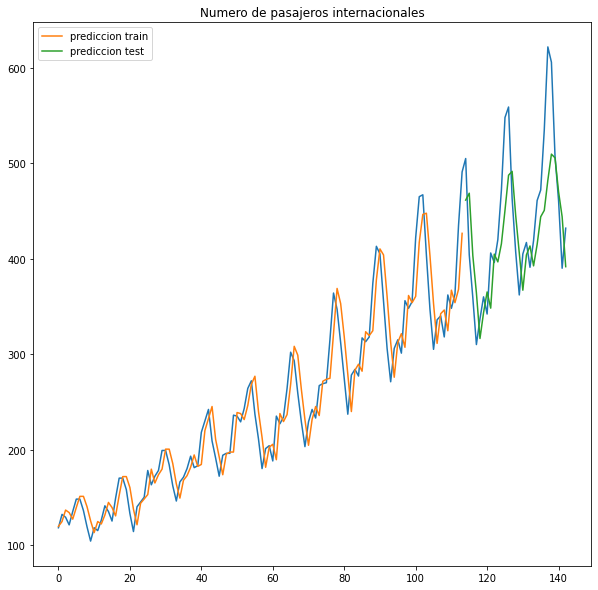

In [26]:
plt.rcParams["figure.figsize"]=[10,10]
plt.plot(pasajeros_y)
plt.plot(train_pred, label="prediccion train")
plt.plot(test_pred_plot, label="prediccion test")
plt.title("Numero de pasajeros internacionales")
plt.legend();